# **Importing the common libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
df= pd.read_csv('/content/drive/MyDrive/gld_price_data.csv')

Mounted at /content/drive


# **Analyzing Data**

In [3]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


 In the above columns

- Date    - Date of data collected for each features
- SPX     - Stock performance index of top 500 companies in United States (S & P 500 Index)
- GLD     - Gold price (Gold)
- USO     - Price of Oil in United States (United states oil Fund)
- SLV     - Silver price (Silver)
- EUR/USD - Euro to United States Dollar exchange rate

In [4]:
df.drop(['Date'],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


In [6]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


* Mean for the Gold Price - 122.732875
* Minimum price for Gold  - 70.000000
* Maximum price for Gold  - 184.589996


# **Visualizing Data**

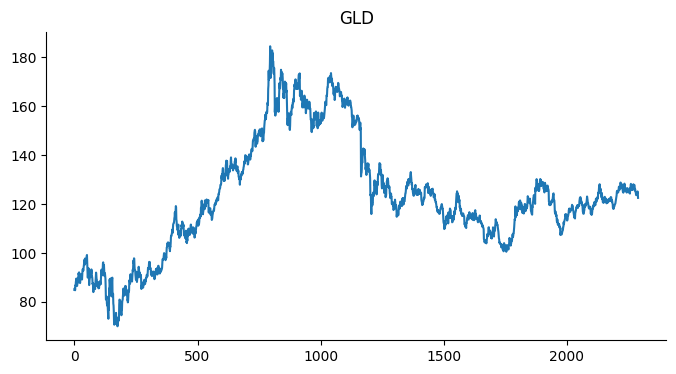

In [7]:
from matplotlib import pyplot as plt
df['GLD'].plot(kind='line', figsize=(8, 4), title='GLD')
plt.gca().spines[['top', 'right']].set_visible(False)

This Visualization shows how the price of Gold has been increasing and decreasing over time

<Figure size 800x500 with 0 Axes>

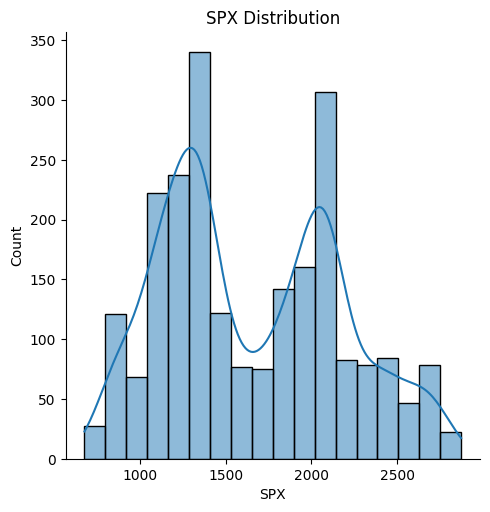

In [8]:
plt.figure(figsize=(8,5))
sns.displot(df['SPX'],kde = True)
plt.title('SPX Distribution')
plt.show()

from this visualization of SPX Distribution, we found most of the Stock performance index were between 1200 and 1500

<Figure size 800x500 with 0 Axes>

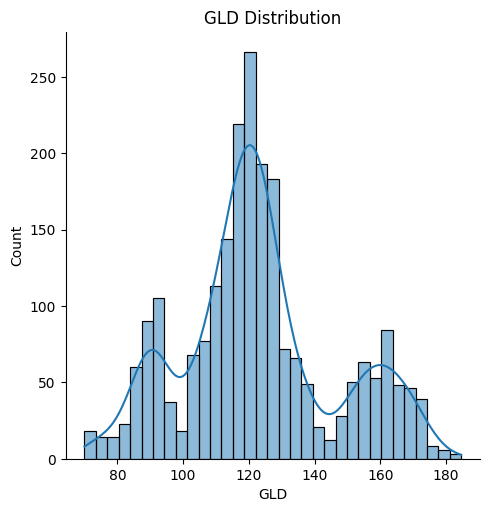

In [9]:
plt.figure(figsize=(8,5))
sns.displot(df['GLD'],kde = True)
plt.title('GLD Distribution')
plt.show()

from this visualization of GLD price Distribution, we found most of the Gold price were between 110 and 130

<Figure size 800x500 with 0 Axes>

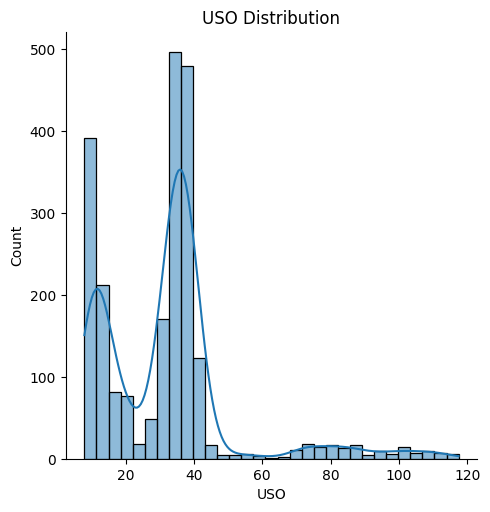

In [10]:
plt.figure(figsize=(8,5))
sns.displot(df['USO'],kde = True)
plt.title('USO Distribution')
plt.show()

from this visualization of USO Distribution, we found most of the oil price were between 30 and 40

<Figure size 800x500 with 0 Axes>

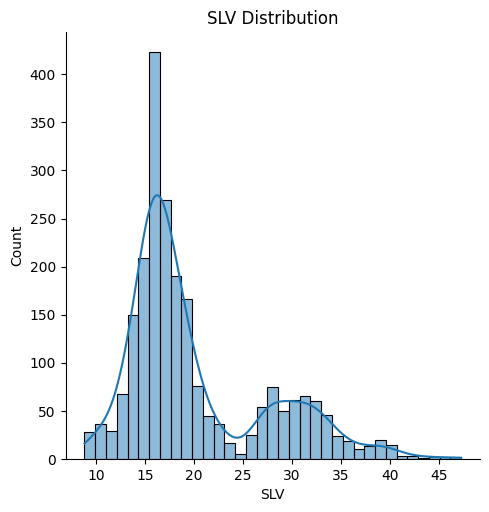

In [11]:
plt.figure(figsize=(8,5))
sns.displot(df['SLV'],kde = True)
plt.title('SLV Distribution')
plt.show()

from this visualization of SLV Distribution, we found most of the Silver price were between 15 and 20

<Figure size 800x500 with 0 Axes>

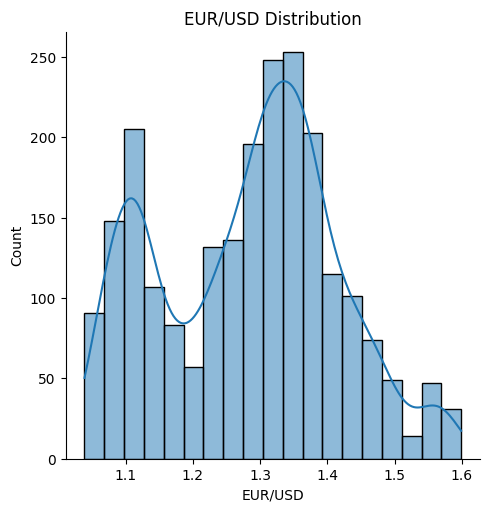

In [12]:
plt.figure(figsize=(8,5))
sns.displot(df['EUR/USD'],kde = True)
plt.title('EUR/USD Distribution')
plt.show()

from this visualization of EUR/USD Distribution, we found most of the Euro to USD exchange rate were between 1.3 and 1.4

# **Finding the Correlation between features and Target**

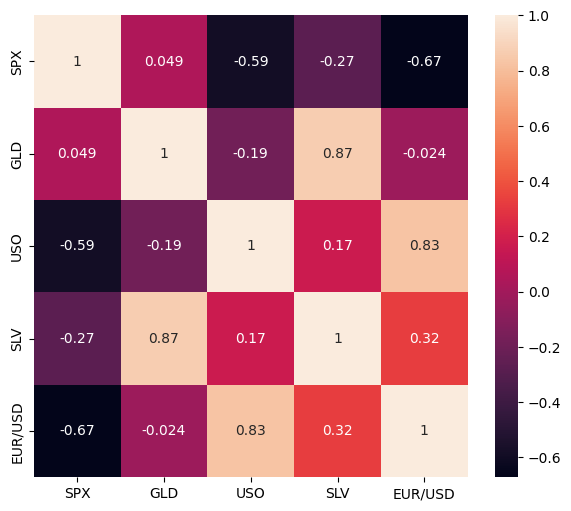

In [13]:
df_corr = df.corr()
plt.figure(figsize = (7,6))
sns.heatmap(df_corr,annot=True)
plt.show()

This heatmap clearly showed that how features were correlated

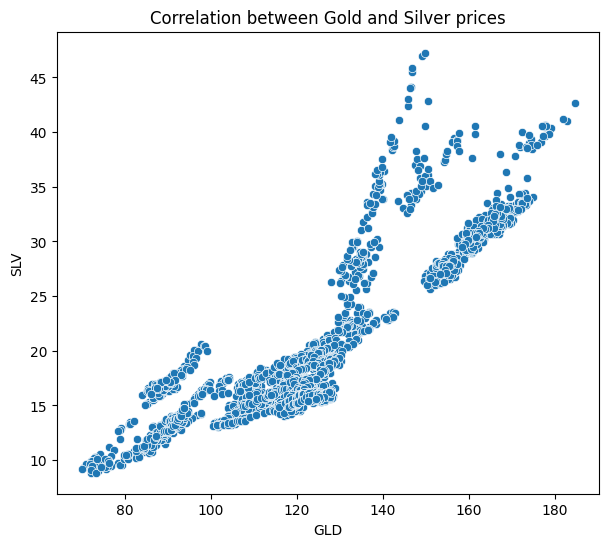

In [14]:
plt.figure(figsize=(7,6))
sns.scatterplot(x='GLD', y='SLV', data=df)
plt.title('Correlation between Gold and Silver prices')
plt.show()

This Scatter plot shows how Gold and Silver Price correlated to each other price

In [15]:
df_corr['GLD'].sort_values(ascending=False)

,GLD
GLD,1.000000
SLV,0.866632
SPX,0.049345
EUR/USD,-0.024375
USO,-0.186360


# **Splitting the Data into Features and Target**

In [16]:
X = df.drop(['GLD'],axis=1)
y = df['GLD']

In [17]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [18]:
y.head()

,GLD
0,84.860001
1,85.570000
2,85.129997
3,84.769997
4,86.779999


# **Importing the libraries for machine learning process to Predict the Gold price**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [20]:
lr = LinearRegression()
rf = RandomForestRegressor()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
svr = SVR()
xgb = XGBRegressor()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1832, 4)
(458, 4)
(1832,)
(458,)


## **Using Multiple machine learning algorithm to find the best model**

In [23]:
models = {
    'Logistic Regression': lr,
    'Random Forest': rf,
    'K-Nearest Neighbors': knn,
    'Decision Tree': dt,
    'Support Vector Regression': svr,
    'XGBoost': xgb
}

In [24]:
for name,model in models.items():
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print(f'Model: {name}')
  print(f'R2 Score: {r2_score(y_test,y_pred)}')
  print(f'Mean Squared Error: {mean_squared_error(y_test,y_pred)}')
  print(f'Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}')

Model: Logistic Regression
R2 Score: 0.8975640982991402
Mean Squared Error: 56.165594215005996
Mean Absolute Error: 5.695900644269285
Model: Random Forest
R2 Score: 0.989883403239503
Mean Squared Error: 5.546928948272757
Mean Absolute Error: 1.2565515989956353
Model: K-Nearest Neighbors
R2 Score: 0.944546720882959
Mean Squared Error: 30.405027154195995
Mean Absolute Error: 3.710370769868996
Model: Decision Tree
R2 Score: 0.9859938486531503
Mean Squared Error: 7.679571322156021
Mean Absolute Error: 1.4295194759825323
Model: Support Vector Regression
R2 Score: 0.13154484322439086
Mean Squared Error: 476.17387185042827
Mean Absolute Error: 16.101974382998606
Model: XGBoost
R2 Score: 0.9885715958139172
Mean Squared Error: 6.266192822854938
Mean Absolute Error: 1.371212750236678


From the above comparison, random forest performs better than other algorithms

In [25]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [26]:
y_pred_value = rf.predict(X_test)

In [27]:
comparison_df = pd.DataFrame()

In [28]:
comparison_df['ytest'] = pd.DataFrame(y_test).reset_index(drop=True)
comparison_df['ypred'] = pd.DataFrame(y_pred_value).reset_index(drop=True)

## **Comparing the test values with predicted values**



In [29]:
comparison_df

,ytest,ypred
0,122.320000,122.454299
1,129.899994,130.314803
2,126.980003,127.712600
3,96.500000,96.560298
4,117.580002,118.967401
...,...,...
453,126.680000,123.602200
454,167.179993,169.277997
455,93.849998,93.717499
456,96.230003,96.255801


- Left column show the original Energy Consumption
- Right column is the predicted value of Energy Consumption by using Machine learning